### Visualize gene sequences
Datasets: 
1. https://archive.ics.uci.edu/dataset/69/molecular+biology+splice+junction+gene+sequences
2. https://archive.ics.uci.edu/dataset/67/molecular+biology+promoter+gene+sequences

##### Import necessary libraries

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from kitikiplot.core import KitikiPlot
from kitikiplot.genomics import linear, grid

import random
import pandas as pd

os.chdir("..")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bsnra\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

### Plot using ```kitikiplot.genomics```

In [2]:
def generate_random_sequence( n ):

    random.seed(111)

    data= list( "ATGCGGGATGC"*n )

    random.shuffle( data )

    return "".join( data )

In [3]:
data= generate_random_sequence( n= 5 )
data

'CGTTAGAGGATGGCGGTTGCGTCGTAACGCGGAATGGGCAACGGGACGGCTGGGT'

#### Linear Plot

```kitikiplot.genomics.linear.plot( ___ )```

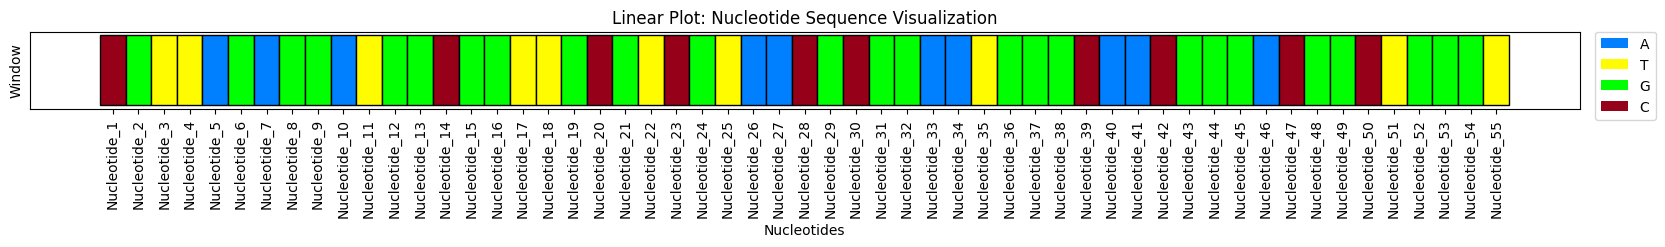

In [4]:
# Preferred for smaller sequences of around 200 nucleotides
linear.plot( 
                nucleotide_sequence= data
            )

#### Grid Plot

```kitikiplot.genomics.grid.plot( ___ )```

In [5]:
data= generate_random_sequence( n= 30 )
print("Length of nucleotide sequence: ", len(data))
data

Length of nucleotide sequence:  330


'GCGCGGATAGTCGCCGGAGCGATGTAAGGGGGCCCGGCTGCGCTGCTTGGCGGGTGGCAGTGGCTGCTGGGCTGCCCCTTAGTGGGGACTCTGGAGGGGTTGGTTGACCAGAATTCCGGTTGAAGTAAGCGAGGGGGGTAACAGGAGTCATAGGCGGAGCGGGTGATTCGTGCTGCGGTGGTAGGGGCCGGGGTCGGGGGCATCGATGGTTCTGTCTTCGGGAGGGCGCAGGTTTAAGCCGCTGGGAGTAAGGACGGGAAGTAACCAGTGGAGAGGGTCGGGGTGAAGTATCAGAGTGAAATCCAGTGGGCCGCGGGGAAGAGAGGACAG'

Default 'window_length= 30'

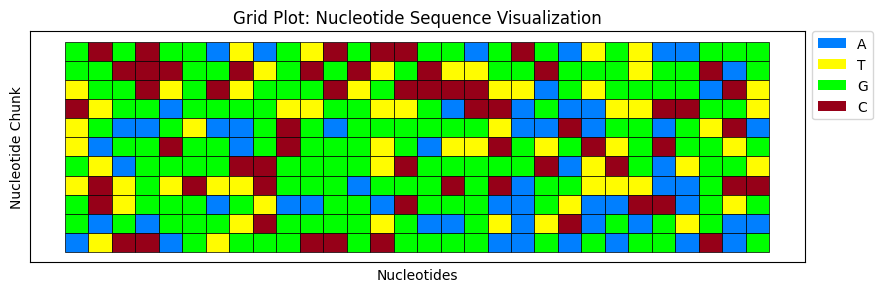

In [9]:
grid.plot( nucleotide_sequence= data )

Set 'window_length= 40'

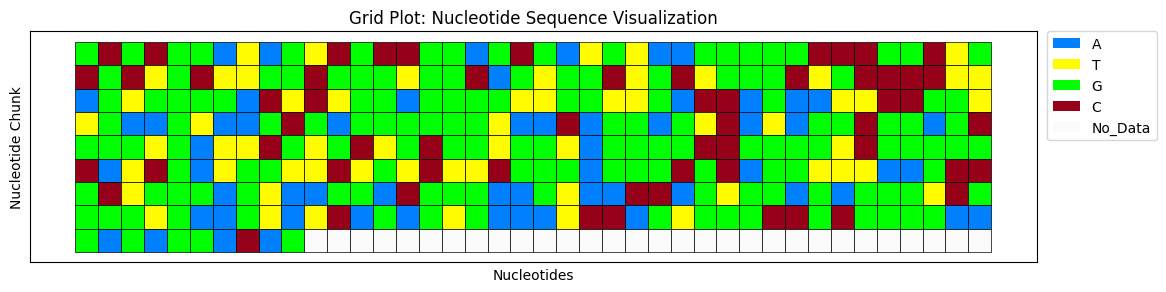

In [10]:
grid.plot( nucleotide_sequence= data, window_length= 40 )

Set 'window_length= 10'

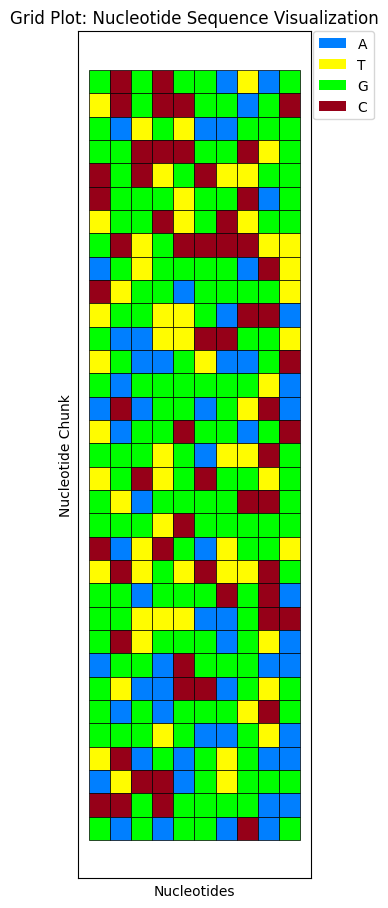

In [11]:
grid.plot( nucleotide_sequence= data, window_length= 10 )

Set 'window_length= 5'

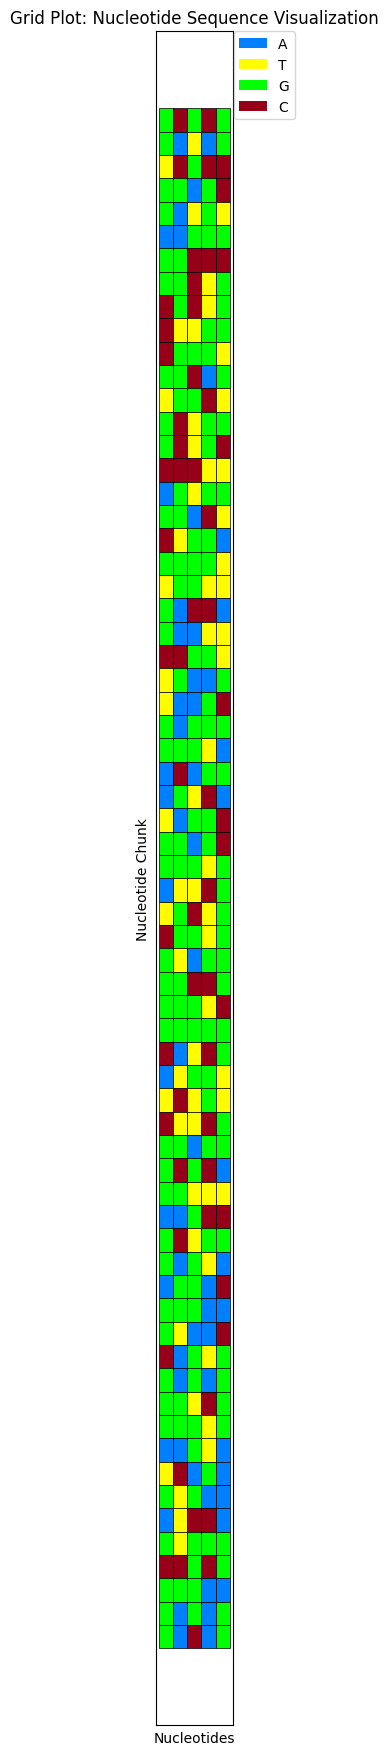

In [12]:
grid.plot( nucleotide_sequence= data, window_length= 5 )

### Plot using ```kitikiplot.core.KitikiPlot```

In [5]:
df= pd.read_csv( "datasets/molecular+biology+splice+junction+gene+sequences/splice.data", header= None )

# Rename the columns
df.columns= ["Label", "Instance_Name", "Nucleotide_Sequence"]

# Select 3 gene sequences randomly
df= df.sample(3, random_state= 1)

# Remove the white spaces from the "Nucleotide_Sequence"
df["Nucleotide_Sequence"]= df["Nucleotide_Sequence"].str.strip()

df

,Label,Instance_Name,Nucleotide_Sequence
1675,N,HUMAMY2A-NEG-361,TGGGTTGATATTGCTCTTGAATGTGAGCGATATTTAGCTCCGAAGG...
1002,IE,HUMCSFGMA-ACCEPTOR-1620,CTGCTCACCGACGAACGACATTTTCCACAGGAGCCGACCTGCCTAC...
2708,N,HUMNFM-NEG-1921,GGCCGCTCGCTAGAGCACGCGCGCCGCAGACCTAGGGTATTTGCGG...


In [4]:
df.iloc[1]["Nucleotide_Sequence"]

'CTGCTCACCGACGAACGACATTTTCCACAGGAGCCGACCTGCCTACAGACCCGCCTGGAG'

In [4]:
from kitikiplot.core import KitikiPlot

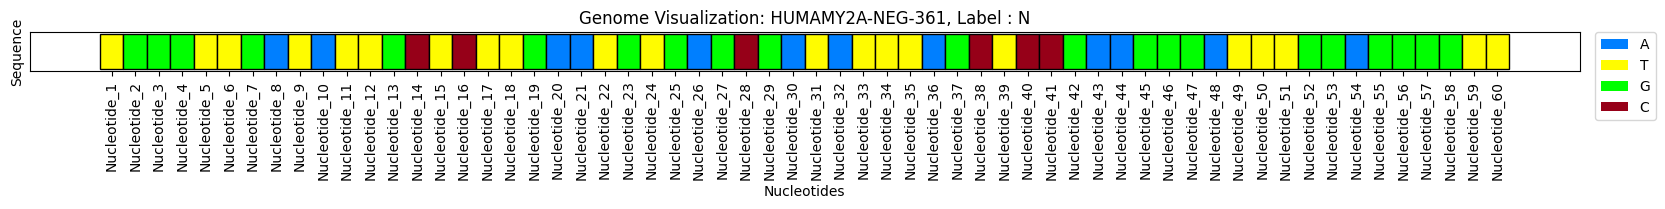

In [6]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= len(df.iloc[index, 2]) )

ktk.plot(
        figsize= (20, 0.5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

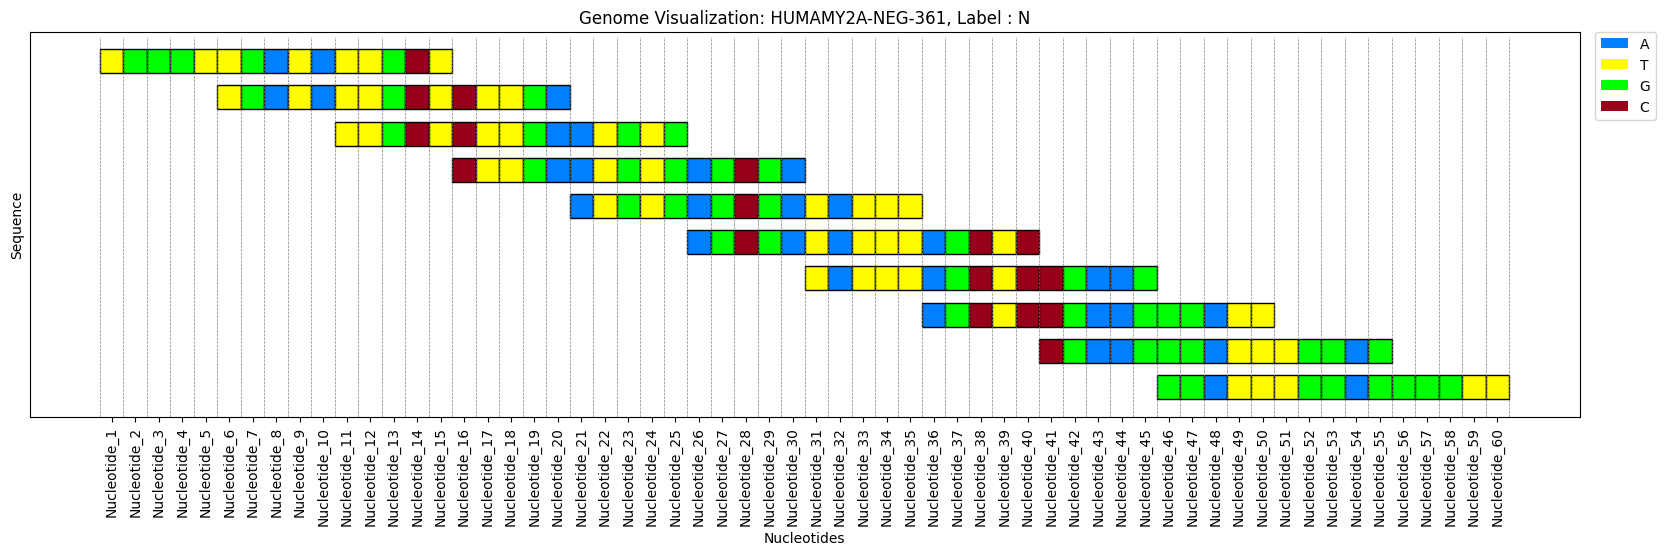

In [7]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 5, window_length= 15 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        display_grid= True,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

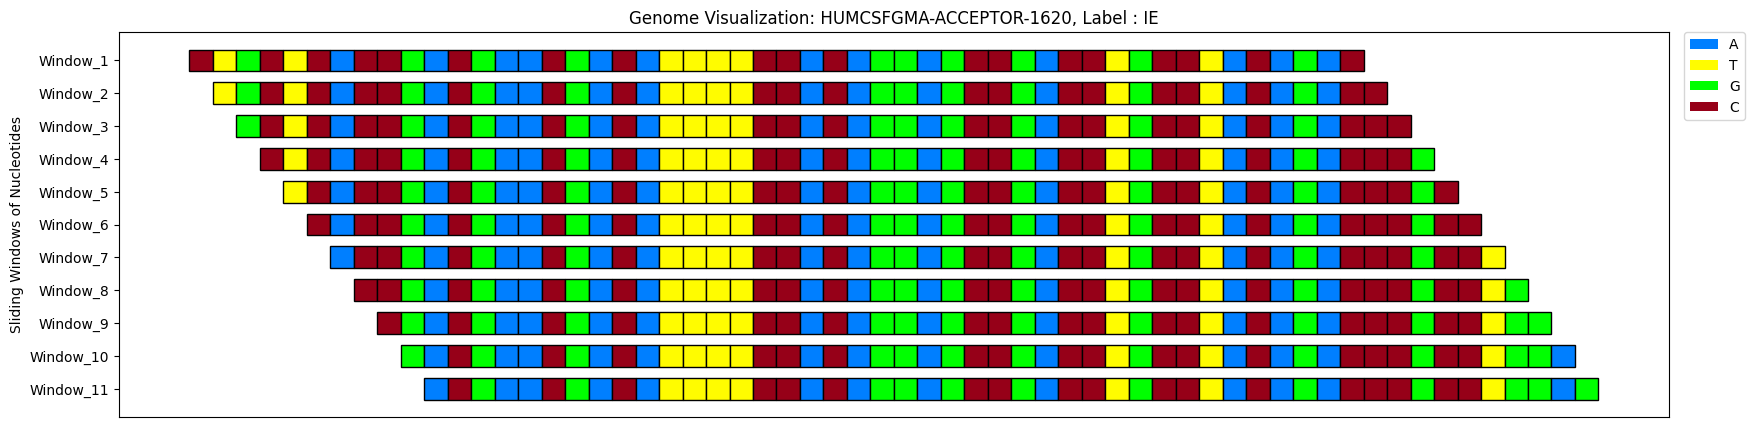

In [8]:
index= 1

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 50 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= True,
        xlabel= "",
        ylabel= "Sliding Windows of Nucleotides",
        display_xticks= False,
        ytick_prefix= "Window",
        xticks_rotation= 90, 
        display_legend= True,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

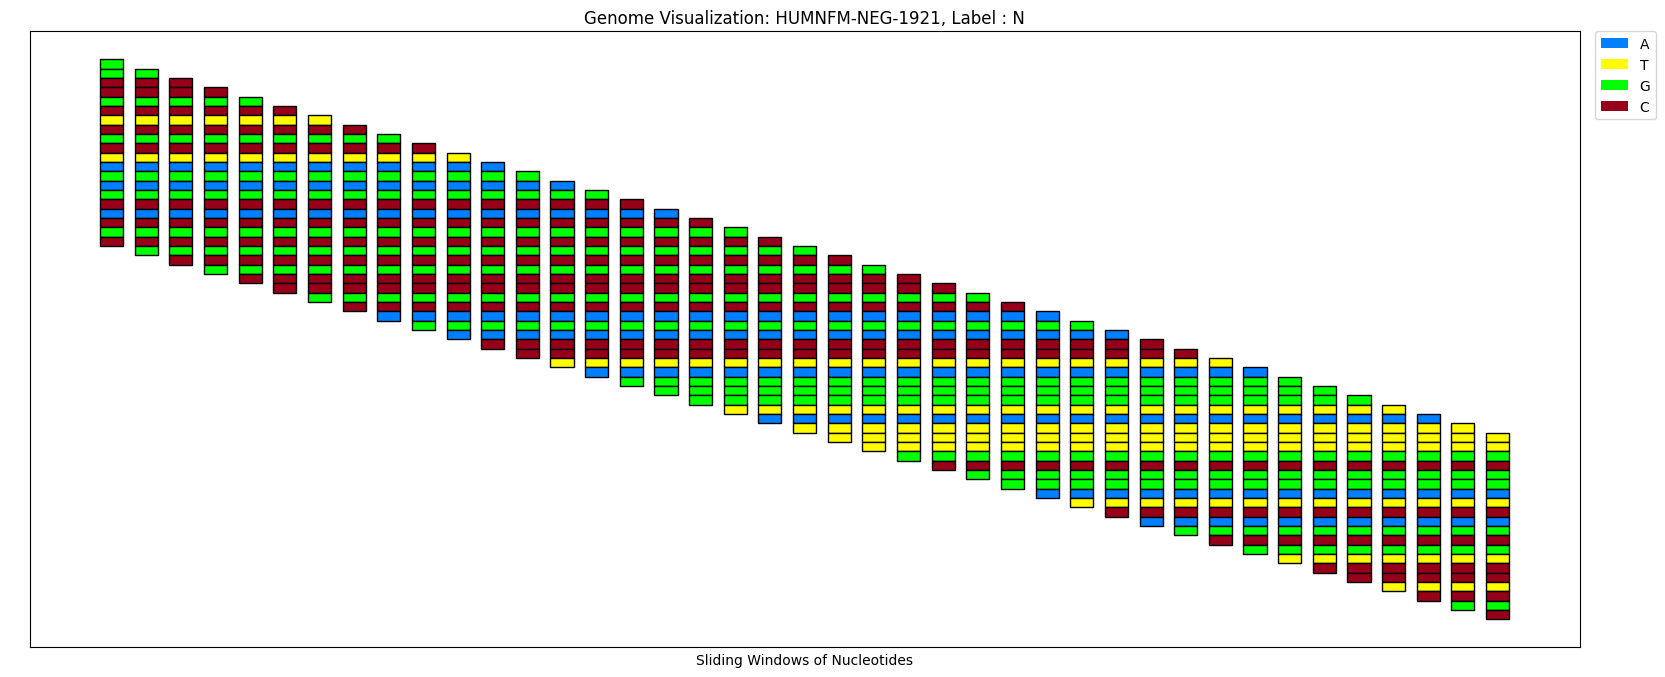

In [9]:
index= 2

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 20 )

ktk.plot(
        figsize= (20, 8),
        cell_width= 2,
        cmap= {'A': '#007FFF', 'T': "#fffc00", "G": "#00ff00", "C": "#960018"},
        transpose= False,
        xlabel= "Sliding Windows of Nucleotides",
        ylabel= " ",
        display_xticks= False,
        display_yticks= False,
        xticks_rotation= 90, 
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

In [10]:
df= pd.read_csv( "datasets/molecular+biology+promoter+gene+sequences/promoters.data", header= None )

# Rename the columns
df.columns= ["Label", "Instance_Name", "Nucleotide_Sequence"]

# Select 3 gene sequences randomly
df= df.sample(3, random_state= 1)

# Remove the white spaces from the "Nucleotide_Sequence"
df["Nucleotide_Sequence"]= df["Nucleotide_Sequence"].str.strip()

df

,Label,Instance_Name,Nucleotide_Sequence
66,-,1203,ttactgtgaacattattcgtctccgcgactacgatgagatgcctga...
35,+,SUBB-E,ccttgaaaaagaggttgacgctgcaaggctctatacgcataatgcg...
59,-,1024,tggatggacgttcaacattgaggaaggcataacgctactacctgat...


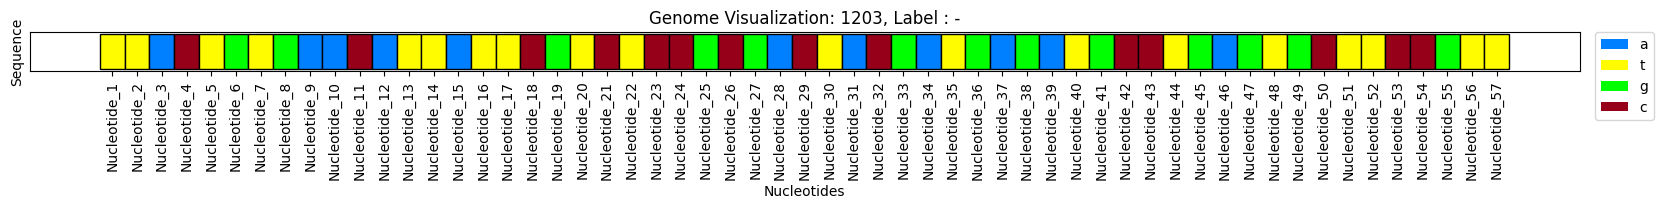

In [11]:
index= 0

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= len(df.iloc[index, 2]) )

ktk.plot(
        figsize= (20, 0.5),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= True,
        xlabel= "Nucleotides",
        ylabel= "Sequence",
        display_yticks= False,
        xtick_prefix= "Nucleotide",
        xticks_rotation= 90,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

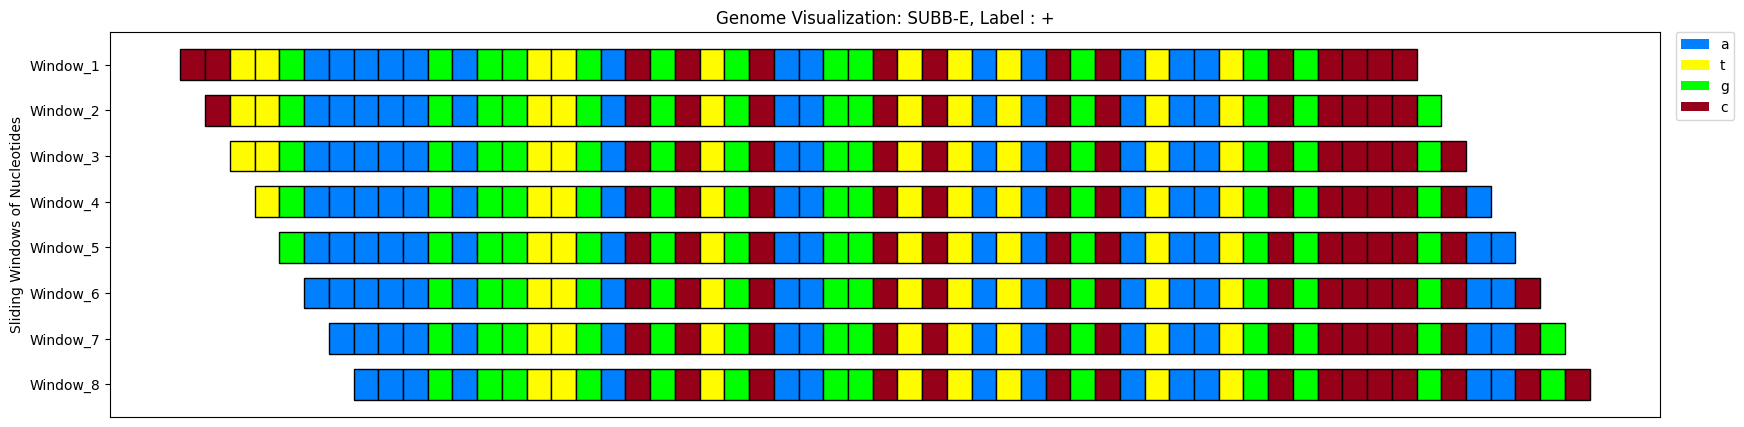

In [12]:
index= 1

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 50 )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= True,
        xlabel= "",
        ylabel= "Sliding Windows of Nucleotides",
        display_xticks= False,
        ytick_prefix= "Window",
        xticks_rotation= 90, 
        display_legend= True,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

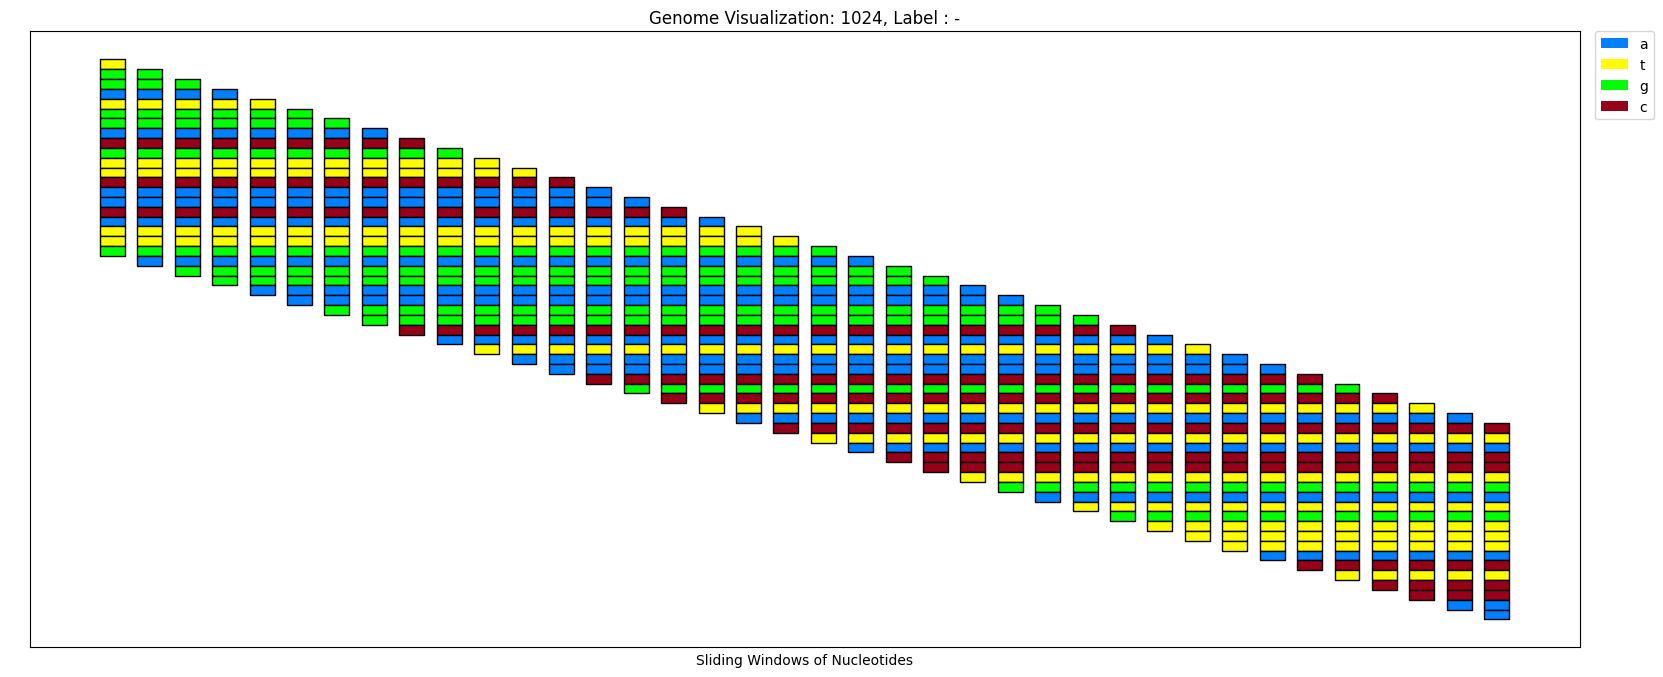

In [13]:
index= 2

ktk= KitikiPlot( data= [i for i in df.iloc[index, 2]], stride= 1, window_length= 20 )

ktk.plot(
        figsize= (20, 8),
        cell_width= 2,
        cmap= {'a': '#007FFF', 't': "#fffc00", "g": "#00ff00", "c": "#960018"},
        transpose= False,
        xlabel= "Sliding Windows of Nucleotides",
        ylabel= " ",
        display_xticks= False,
        display_yticks= False,
        title= "Genome Visualization: "+df.iloc[index, 1].strip()+", Label : "+df.iloc[index,0].strip(),
        display_legend= True,
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})

END
______